<a href="https://colab.research.google.com/github/WelfLowe/ML4developers/blob/main/0%E2%80%93Sklearn-PyToarch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification on the Iris datasets

Import necessary libraries.

In [143]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import numpy as np
import tqdm

## 1. Collect the data

Someone has collected the Iris data for us, so we just need to load this dataset and convert it into a $\verb|numpy|$ array.

In [144]:
iris = load_iris()
print(iris.data.shape)
print(iris.target.shape)
print(iris.feature_names)
print(iris.target_names)
X, y = iris.data, iris.target

(150, 4)
(150,)
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


## 2. Prepare the data

Split the data in training and test set

In [145]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Standardize the features

In [146]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## 3. Set/tune the model

We just select a Support Vector Classifier from the library.


In [147]:
clf = SVC()

## 4. Train the model

We just call one function

In [148]:
clf.fit(X_train, y_train)

SVC()

## 5. Evaluate the *model*

Predict on the test set


In [149]:
y_pred = clf.predict(X_test)

Evaluate the model's accuracy

In [150]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 1.00


Compute and show the confusion matrix

[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


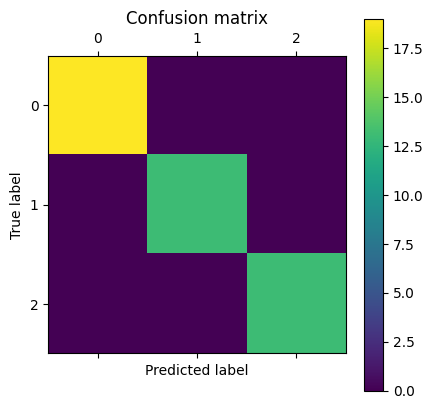

In [151]:
def ComputeConfusionMatrix(y_test, y_pred):
  cm = confusion_matrix(y_test, y_pred)
  print(cm)

  # Show confusion matrix in a separate window
  plt.matshow(cm)
  plt.title('Confusion matrix')
  plt.colorbar()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

ComputeConfusionMatrix(y_test, y_pred)


## Same using PyToarch

Import the libraries. Then continue with step 3.


In [152]:
import torch
import torch.nn.functional as F
import torch.nn as nn
from torch.autograd import Variable

## 3. Set/tune the model

In [153]:
class Model(nn.Module):
    def __init__(self, input_dim):
        super(Model, self).__init__()
        self.layer1 = nn.Linear(input_dim, 50)
        self.layer2 = nn.Linear(50, 50)
        self.layer3 = nn.Linear(50, 3)

    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = F.softmax(self.layer3(x), dim=1)
        return x

In [154]:
model     = Model(X_train.shape[1])
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn   = nn.CrossEntropyLoss()
model


Model(
  (layer1): Linear(in_features=4, out_features=50, bias=True)
  (layer2): Linear(in_features=50, out_features=50, bias=True)
  (layer3): Linear(in_features=50, out_features=3, bias=True)
)

## 4. Train the model

In [155]:
EPOCHS  = 100
X_train_py = Variable(torch.from_numpy(X_train)).float()
y_train_py = Variable(torch.from_numpy(y_train)).long()
X_test_py  = Variable(torch.from_numpy(X_test)).float()
y_test_py  = Variable(torch.from_numpy(y_test)).long()

loss_list     = np.zeros((EPOCHS,))
accuracy_list = np.zeros((EPOCHS,))

for epoch in tqdm.trange(EPOCHS):
    y_pred_py = model(X_train_py)
    loss = loss_fn(y_pred_py, y_train_py)
    loss_list[epoch] = loss.item()

    # Zero gradients
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    with torch.no_grad():
        y_pred_py = model(X_test_py)
        correct = (torch.argmax(y_pred_py, dim=1) == y_test_py).type(torch.FloatTensor)
        accuracy_list[epoch] = correct.mean()

100%|██████████| 100/100 [00:00<00:00, 627.19it/s]


## 5. Evaluate the model

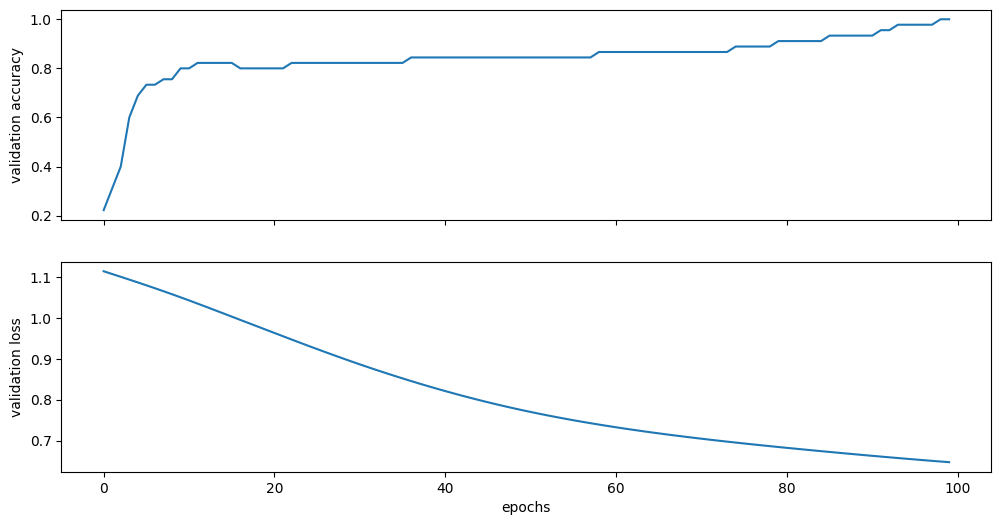

In [156]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(12, 6), sharex=True)

ax1.plot(accuracy_list)
ax1.set_ylabel("validation accuracy")
ax2.plot(loss_list)
ax2.set_ylabel("validation loss")
ax2.set_xlabel("epochs");

Accuracy: 1.00
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


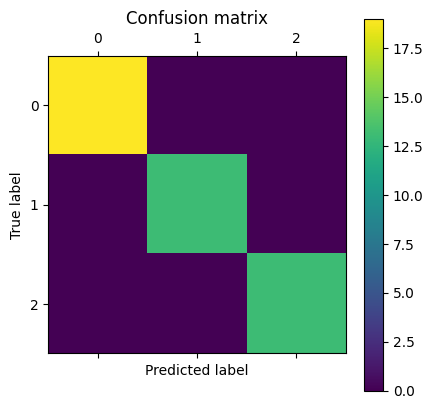

In [157]:
y_pred_py = model(X_test_py)
y_test_np = y_test_py.detach().numpy()
y_pred_np = (torch.argmax(y_pred_py, dim=1)).detach().numpy()

accuracy = accuracy_score(y_test_np, y_pred_np)
print(f"Accuracy: {accuracy:.2f}")

ComputeConfusionMatrix(y_test_np, y_pred_np)
